Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [21]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

import seaborn
import matplotlib.pyplot as plt
from pprint import pprint

os.chdir('../data')

In [2]:
docomo_station_df = pd.read_csv('docomo_all_stations.csv')
docomo_area_df = pd.read_csv('docomo_area_fs.csv')

In [3]:
docomo_station_df.rename({'name': 'station_name'}, axis=1, inplace=True)
docomo_station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16028 entries, 0 to 16027
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16028 non-null  int64  
 1   station_name  16028 non-null  object 
 2   empty_slots   16028 non-null  int64  
 3   free_bikes    16028 non-null  int64  
 4   total_slots   16028 non-null  int64  
 5   latitude      16028 non-null  float64
 6   longitude     16028 non-null  float64
 7   timestamp     16028 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1001.9+ KB


In [4]:
docomo_area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18778 entries, 0 to 18777
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18778 non-null  int64  
 1   categories.id           18778 non-null  int64  
 2   categories.name         18778 non-null  object 
 3   categories.short_name   18778 non-null  object 
 4   categories.plural_name  18778 non-null  object 
 5   categories.icon.prefix  18778 non-null  object 
 6   categories.icon.suffix  18778 non-null  object 
 7   name                    18778 non-null  object 
 8   fsq_id                  18778 non-null  object 
 9   latitude                18778 non-null  float64
 10  longitude               18778 non-null  float64
 11  station_name            18778 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.7+ MB


In [5]:
docomo_area_df.head()

Unnamed: 0  categories.id       categories.name categories.short_name  \
0           0          13031          Burger Joint               Burgers   
1           1          13145  Fast Food Restaurant             Fast Food   
2           2          13281       Udon Restaurant                  Udon   
3           3          13272      Ramen Restaurant                 Ramen   
4           4          13020              Sake Bar              Sake Bar   

  categories.plural_name                             categories.icon.prefix  \
0          Burger Joints  https://ss3.4sqi.net/img/categories_v2/food/bu...   
1  Fast Food Restaurants  https://ss3.4sqi.net/img/categories_v2/food/fa...   
2       Udon Restaurants  https://ss3.4sqi.net/img/categories_v2/food/ra...   
3      Ramen Restaurants  https://ss3.4sqi.net/img/categories_v2/food/ra...   
4              Sake Bars  https://ss3.4sqi.net/img/categories_v2/nightli...   

  categories.icon.suffix                      name                    fsq_id  \
0                   .png                FIRE HOUSE  4b542534f964a52032b327e3   
1                   .png                FIRE HOUSE  4b542534f964a52032b327e3   
2                   .png  TOKYO LIGHT BLUE HONGO-3  5ceb6cc7588e36002c5dd8e4   
3                   .png        Nishino (中華蕎麦 にし乃)  5a88e618cbcdee114ecd2f4a   
4                   .png                    加賀屋本郷店  4b5ef33cf964a520519f29e3   

    latitude   longitude station_name  
0  35.707565  139.758191  E5-26.本郷4丁目  
1  35.707565  139.758191  E5-26.本郷4丁目  
2  35.706507  139.760552  E5-26.本郷4丁目  
3  35.706755  139.761595  E5-26.本郷4丁目  
4  35.706614  139.760518  E5-26.本郷4丁目

In [6]:
docomo_area_df = docomo_area_df[['name', 'categories.short_name', 'categories.id', 'latitude', 'longitude', 'station_name']]
docomo_area_df.rename({'categories.short_name': 'category', 'categories.id': 'category_id'}, axis=1, inplace=True)
docomo_area_df.head()

name   category  category_id   latitude   longitude  \
0                FIRE HOUSE    Burgers        13031  35.707565  139.758191   
1                FIRE HOUSE  Fast Food        13145  35.707565  139.758191   
2  TOKYO LIGHT BLUE HONGO-3       Udon        13281  35.706507  139.760552   
3        Nishino (中華蕎麦 にし乃)      Ramen        13272  35.706755  139.761595   
4                    加賀屋本郷店   Sake Bar        13020  35.706614  139.760518   

  station_name  
0  E5-26.本郷4丁目  
1  E5-26.本郷4丁目  
2  E5-26.本郷4丁目  
3  E5-26.本郷4丁目  
4  E5-26.本郷4丁目

In [7]:
all_data_df = pd.merge(docomo_station_df, docomo_area_df, how='left', on='station_name')

In [8]:
all_data_df.drop(['Unnamed: 0'], axis=1, inplace=True)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225330 entries, 0 to 225329
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   station_name  225330 non-null  object 
 1   empty_slots   225330 non-null  int64  
 2   free_bikes    225330 non-null  int64  
 3   total_slots   225330 non-null  int64  
 4   latitude_x    225330 non-null  float64
 5   longitude_x   225330 non-null  float64
 6   timestamp     225330 non-null  object 
 7   name          225230 non-null  object 
 8   category      225230 non-null  object 
 9   category_id   225230 non-null  float64
 10  latitude_y    225230 non-null  float64
 11  longitude_y   225230 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 20.6+ MB


This dataframe contains all data, but is not useful in its current form for determining how station metrics vary with nearby amenities. I will condense the nearby places by their category_ids and add the counts to the dataframe instead.

From the yelp_foursquare_EDA notebooks:

categories = [bars] + [restaurants] + [landmarks] + [convenience store] + [train station]

categories = ([str(i) for i in range(13003, 13026)] + ['13389', '10032']) + [str(i) for i in range(13027, 13390)] + [str(i) for i in range(16000, 16060)] \
    + ['17029'] + ['19066']

No places corresponded to a train station in dataset, so I will drop these values from the analysis.

In [9]:
docomo_area_count_df = docomo_area_df.drop_duplicates(['name', 'station_name'])
area_restaurants = docomo_area_count_df[(docomo_area_count_df['category_id'] >= 13026) & (docomo_area_count_df['category_id'] <= 13389)]
area_restaurants_count = area_restaurants.groupby('station_name').count()['name']
area_bars = docomo_area_count_df[((docomo_area_count_df['category_id'] >= 13003) & (docomo_area_count_df['category_id'] <= 13025)) | (docomo_area_count_df['category_id'] == 13389) |
                                 (docomo_area_count_df['category_id'] == 10032)]
area_bars_count = area_bars.groupby('station_name').count()['name']
area_landmarks_parks = docomo_area_count_df[(docomo_area_count_df['category_id'] >= 16000) & (docomo_area_count_df['category_id'] <= 16059)]
area_landmarks_parks_count = area_landmarks_parks.groupby('station_name').count()['name']
area_convenience = docomo_area_count_df[docomo_area_count_df['category_id'] == 17029]
area_convenience_count = area_convenience.groupby('station_name').count()['name']

Big ol' block of name merging and column name wranglin':

In [10]:
docomo_area_count_df = pd.merge(docomo_area_count_df, area_restaurants_count, how='left', left_on='station_name', right_index=True)
docomo_area_count_df.rename({'name_y': 'n_restaurants'}, axis=1, inplace=True)
docomo_area_count_df = pd.merge(docomo_area_count_df, area_bars_count, how='left', left_on='station_name', right_index=True)
docomo_area_count_df.rename({'name': 'n_bars'}, axis=1, inplace=True)
docomo_area_count_df = pd.merge(docomo_area_count_df, area_landmarks_parks_count, how='left', left_on='station_name', right_index=True)
docomo_area_count_df.rename({'name': 'n_landmarks_parks'}, axis=1, inplace=True)
docomo_area_count_df = pd.merge(docomo_area_count_df, area_convenience_count, how='left', left_on='station_name', right_index=True)
docomo_area_count_df.rename({'name': 'n_convenience'}, axis=1, inplace=True)
docomo_area_count_df.rename({'name_x': 'name'}, axis=1, inplace=True)
docomo_area_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13237 entries, 0 to 18776
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13237 non-null  object 
 1   category           13237 non-null  object 
 2   category_id        13237 non-null  int64  
 3   latitude           13237 non-null  float64
 4   longitude          13237 non-null  float64
 5   station_name       13237 non-null  object 
 6   n_restaurants      13207 non-null  float64
 7   n_bars             7185 non-null   float64
 8   n_landmarks_parks  10794 non-null  float64
 9   n_convenience      3946 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


NaNs only exist in the new location counts column and should be replaced with 0s.

In [11]:
docomo_area_count_df.fillna(0, inplace=True)
docomo_area_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13237 entries, 0 to 18776
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13237 non-null  object 
 1   category           13237 non-null  object 
 2   category_id        13237 non-null  int64  
 3   latitude           13237 non-null  float64
 4   longitude          13237 non-null  float64
 5   station_name       13237 non-null  object 
 6   n_restaurants      13237 non-null  float64
 7   n_bars             13237 non-null  float64
 8   n_landmarks_parks  13237 non-null  float64
 9   n_convenience      13237 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [12]:
docomo_area_count_df = docomo_area_count_df[['station_name', 'n_restaurants', 'n_bars', 'n_landmarks_parks', 'n_convenience']]
docomo_area_count_df.drop_duplicates(inplace=True)

In [13]:
docomo_station_area_df = pd.merge(docomo_station_df, docomo_area_count_df, how='left', on='station_name')
docomo_station_area_df.drop('Unnamed: 0', axis=1, inplace=True)
docomo_station_area_df['timestamp'] = pd.to_datetime(docomo_station_area_df['timestamp'])
docomo_station_area_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16028 entries, 0 to 16027
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   station_name       16028 non-null  object        
 1   empty_slots        16028 non-null  int64         
 2   free_bikes         16028 non-null  int64         
 3   total_slots        16028 non-null  int64         
 4   latitude           16028 non-null  float64       
 5   longitude          16028 non-null  float64       
 6   timestamp          16028 non-null  datetime64[ns]
 7   n_restaurants      15928 non-null  float64       
 8   n_bars             15928 non-null  float64       
 9   n_landmarks_parks  15928 non-null  float64       
 10  n_convenience      15928 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 1.3+ MB


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization. 

<Axes: >

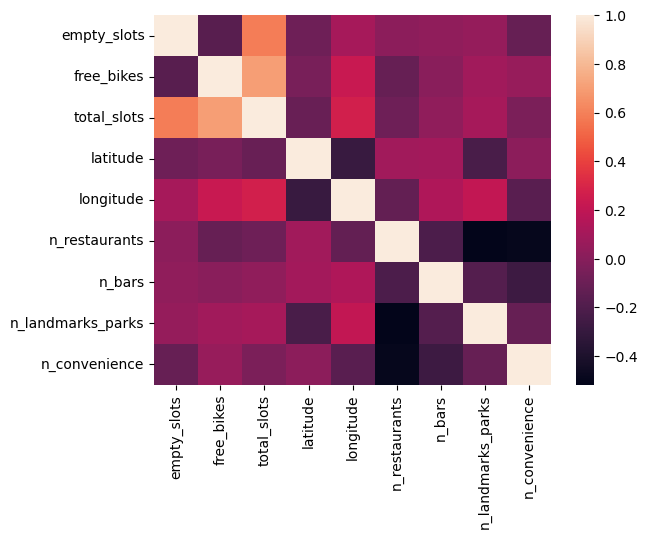

In [14]:
pcorr_matrix = docomo_station_area_df.corr(numeric_only=True)

seaborn.heatmap(pcorr_matrix, robust=True)

Unsurprisingly, I found little to no correlation between any of the station data and the number of surrounding restaurants, bars, landmarks/parks, or convenience stores when the time axis was not considered. I did, however, collect data at different times between (UTC) 11:15:04 and 18:42:03 on 2024-02-08, which corresponds to 08:15:04 and 15:42:03 Tokyo (JST). It might be interesting to see if the station data correlates with the time of day.

In [15]:
earliest_time = pd.to_datetime(docomo_station_area_df['timestamp'].min())
latest_time = docomo_station_area_df['timestamp'].max()

print(earliest_time)
print(latest_time)

2024-02-08 11:15:04
2024-02-08 18:52:03


In [16]:
docomo_station_area_df['timestamp'] = docomo_station_area_df['timestamp'].apply(lambda x: (x - earliest_time).seconds)

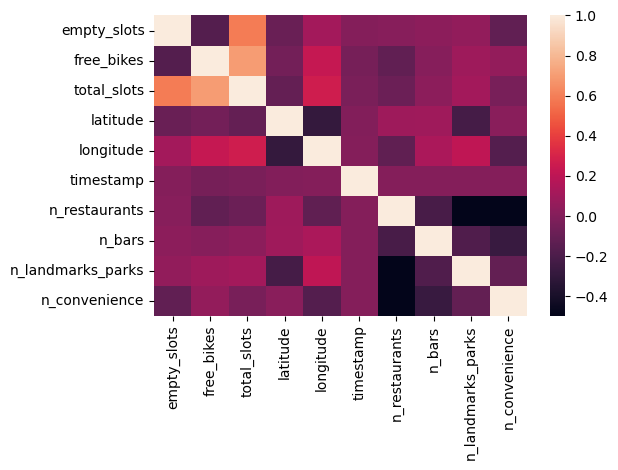

In [19]:
pcorr_matrix = docomo_station_area_df.corr(numeric_only=True)

heatmap = seaborn.heatmap(pcorr_matrix, robust=True)  
fig = heatmap.get_figure()
fig.tight_layout()
fig.savefig('../images/corr_matrix.png')

Unfortunately, the elapsed time also does not seem to correlate strongly with the any of the other variables.

degree_to_km_approx = 0.009043717

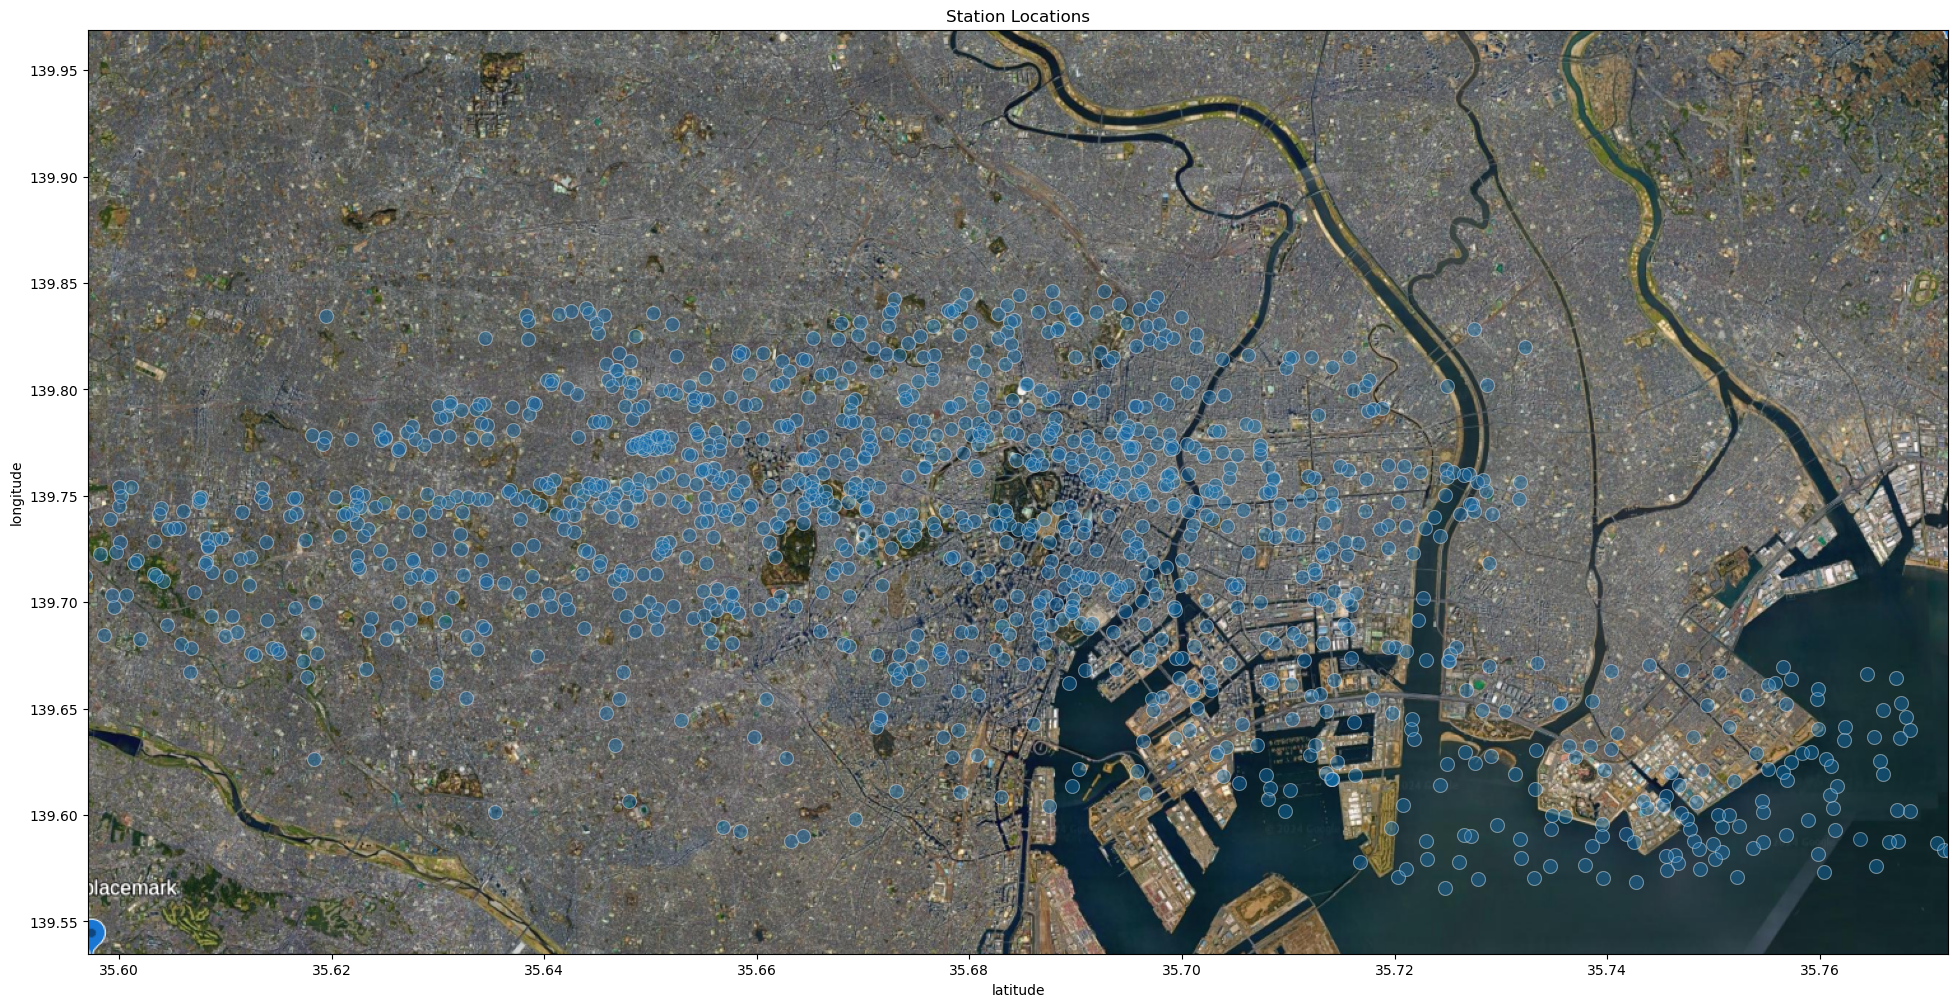

In [56]:
img =plt.imread('../images/tokyo_clean.png', format='png')
fig, ax = plt.subplots(figsize = (24, 12))
seaborn.scatterplot(data=docomo_station_df, x=docomo_station_df['latitude'],
                    y=docomo_station_df['longitude'], alpha=0.05, s=100)
plt.xlim(35.5970959,35.7720649)
plt.ylim(139.5348296,139.9690282)
plt.title('Station Locations')
ax.imshow(img, extent=[35.5970959, 35.7720649, 139.5348296, 139.9690282], aspect='auto')

The initial scatterplot shows a concerning amount of bike stations as being underwater.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3 as sql

con = sql.connect('Docomo_stations.db')
cursor = con.cursor()

In [ ]:
# docomo_station_df[['station_name', 'latitude', 'longitude']].drop_duplicates().to_sql('stations', con)

In [ ]:
# docomo_station_df[['station_name', 'empty_slots', 'free_bikes', 'total_slots', 'timestamp']].drop_duplicates().to_sql('bike_info', con)

All of the station data can be stores in the 'stations' and 'bike_info' tables. However, there is a fundamental difficulty in storing all of the area info without duplication. The problem is that one location can be within 1000m of any other location. I think that in the future it would be worthwhile to store the radius of the circle in the 'stations' data and connect information in a 'area' table to it via the circle. For now, I am just going to create an 'area_counts' table to store the "n counts" data for each station, and an 'areas' table that contains rows which are duplicate save for the associated station.

In [ ]:
# docomo_area_count_df.to_sql('area_counts', con)

In [ ]:
# docomo_area_df.drop_duplicates(['name', 'station_name'])[['name', 'category_id', 'latitude', 'longitude', 'station_name']].to_sql('areas', con)

In [ ]:
# docomo_area_df.drop_duplicates(['name', 'station_name'])[['category_id', 'category']].drop_duplicates().to_sql('categories', con)

Look at the data before and after the join to validate your data.

In [ ]:
all_data_sql_df = pd.read_sql_query(
    """
    SELECT *
    FROM stations s
    JOIN bike_info bi USING(station_name)
    JOIN areas a USING(station_name)
    JOIN categories c USING(category_id)
    """
, con)

all_data_df = pd.read_csv('all_data.csv')

In [ ]:
all_data_sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158764 entries, 0 to 158763
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         158764 non-null  int64  
 1   station_name  158764 non-null  object 
 2   latitude      158764 non-null  float64
 3   longitude     158764 non-null  float64
 4   index         158764 non-null  int64  
 5   empty_slots   158764 non-null  int64  
 6   free_bikes    158764 non-null  int64  
 7   total_slots   158764 non-null  int64  
 8   timestamp     158764 non-null  object 
 9   index         158764 non-null  int64  
 10  name          158764 non-null  object 
 11  category_id   158764 non-null  int64  
 12  latitude      158764 non-null  float64
 13  longitude     158764 non-null  float64
 14  index         158764 non-null  int64  
 15  category      158764 non-null  object 
dtypes: float64(4), int64(8), object(4)
memory usage: 19.4+ MB


In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225330 entries, 0 to 225329
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    225330 non-null  int64  
 1   station_name  225330 non-null  object 
 2   empty_slots   225330 non-null  int64  
 3   free_bikes    225330 non-null  int64  
 4   total_slots   225330 non-null  int64  
 5   latitude_x    225330 non-null  float64
 6   longitude_x   225330 non-null  float64
 7   timestamp     225330 non-null  object 
 8   name          225230 non-null  object 
 9   category      225230 non-null  object 
 10  category_id   225230 non-null  float64
 11  latitude_y    225230 non-null  float64
 12  longitude_y   225230 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 22.3+ MB


All of the columns present in the original all_data_df dataframe are also present in the all_data_sql_df dataframe, and the excess columns in all_data_sql_df seem to be indices that were added in the process of converting the dataframes to SQL tables. There are less rows of data in all_data_sql_df, but this could likely be explained by me condensing every location down to only one category_id instead of several:

In [ ]:
print(all_data_sql_df['name'].nunique())
print(all_data_df['name'].nunique())

sum(all_data_df.groupby('name').count()['category_id'].sort_index() > all_data_sql_df.groupby('name').count()['category_id'].sort_index())

2193
2193


721

There are 2193 unique locations in both dataframes, but all_data_df contains 721 locations with more associated category_ids than all_data_sql_df. This adds further evidence to the claim that the difference in rows of data between the two dataframes is at least partially due to the reduction in category ids. I am comfortable with this loss of information based on my initial inspection of locations possessing multiple category_ids. For the most part, these categories were very closely tied or identical.